# Experimental Semivariogram and Covariogram

In this exercise you will learn how to build the omnidirectional experimental semivariance and covariance for your spatial data. You will use two basic functions:

- `calculate_semivariance()`
- `calculate_covariance()`

## Prerequisites

- **Domain**:
  - understanding what are semivariance and covariance of spatial datasets
- **Package**:
  - installation
- **Programming**:
  - Python basics

## Table of contents

1. Load and visualize input data.
2. Calculate experimental semivariance.
3. Plot experimental semivariogram.
4. Calculate experimental covariance.
5. Plot experimental covariogram.

In [1]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

from src.pyinterpolate import calculate_covariance, calculate_semivariance

## Dataset

Dataset in this tutorial is the Digital Elevation Model around Gorzów Wielkopolski city in Poland.

In [2]:
df = pd.read_csv(
    'data/dem.csv'
)
df.head()

,longitude,latitude,dem
0,15.115241,52.765146,91.275597
1,15.115241,52.742790,96.548294
2,15.115241,52.710706,51.254551
3,15.115241,52.708844,48.958282
4,15.115241,52.671378,16.817863


## Visualize data

In [3]:
# Populate geometry column and set CRS

dem_geometry = gpd.points_from_xy(x=df['longitude'], y=df['latitude'], crs='epsg:4326')
dem = gpd.GeoDataFrame(df, geometry=dem_geometry)

# Transform crs to metric values
dem.to_crs(epsg=2180, inplace=True)

In [4]:
dem.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6895 entries, 0 to 6894
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   longitude  6895 non-null   float64 
 1   latitude   6895 non-null   float64 
 2   dem        6895 non-null   float64 
 3   geometry   6895 non-null   geometry
dtypes: float64(3), geometry(1)
memory usage: 215.6 KB


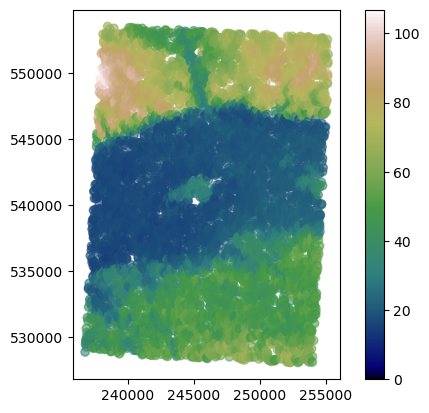

In [5]:
dem.plot(column='dem', cmap='gist_earth', alpha=0.6, vmin=0, legend=True);

Presented map clearly shows a river valley. Regions of similar height are grouped together.

## Calculate Experimental Semivariance

Experimental semivariance and experimental covariance are calculated from the arrays with coordinates and values. The `longitude` and `latitude` columns have coordinates in a geometric projection not suited for spatial analysis. On the other hand, `geometry` is transformed to `EPSG:2180`, and this projection is metric. We can use it for semivariogram estimation.

### Calculate Semivariance

In [6]:
exp_semi = calculate_semivariance(
    ds=dem[['geometry', 'dem']],
    step_size=500,
    max_range=10_000
)

### Plot Semivariance

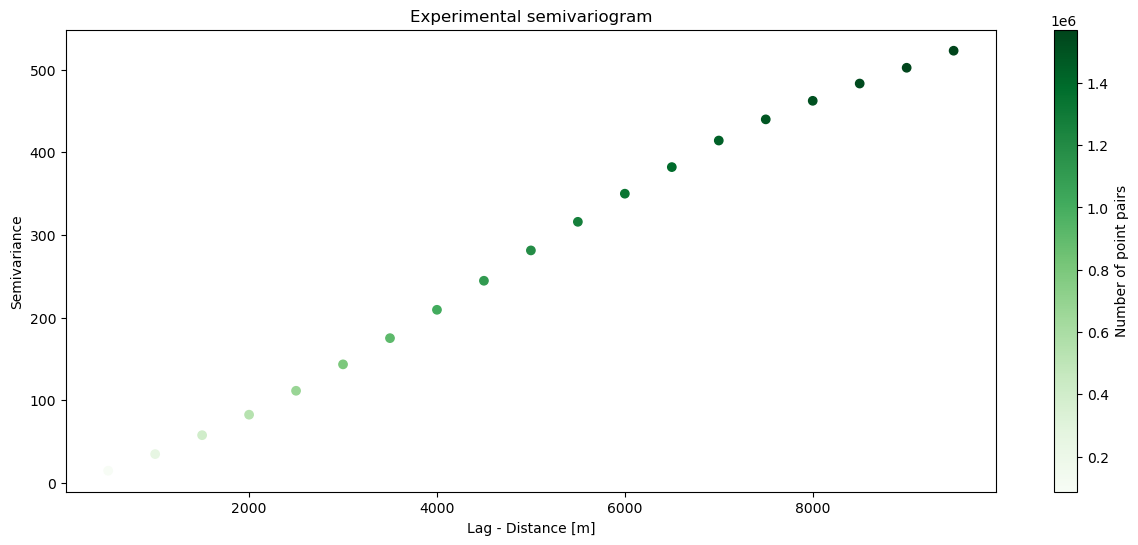

In [7]:
plt.figure(figsize=(15, 6))
plt.scatter(exp_semi[:, 0],
            exp_semi[:, 1],
            c=exp_semi[:, 2],
            cmap='Greens')
plt.title('Experimental semivariogram')
plt.xlabel('Lag - Distance [m]')
plt.ylabel('Semivariance')
plt.colorbar(label='Number of point pairs')
plt.show()

### Calculate Covariance

In [8]:
exp_cov = calculate_covariance(
    ds=dem[['geometry', 'dem']],
    step_size=500,
    max_range=10_000
)

KeyboardInterrupt: 

### Plot Covariance

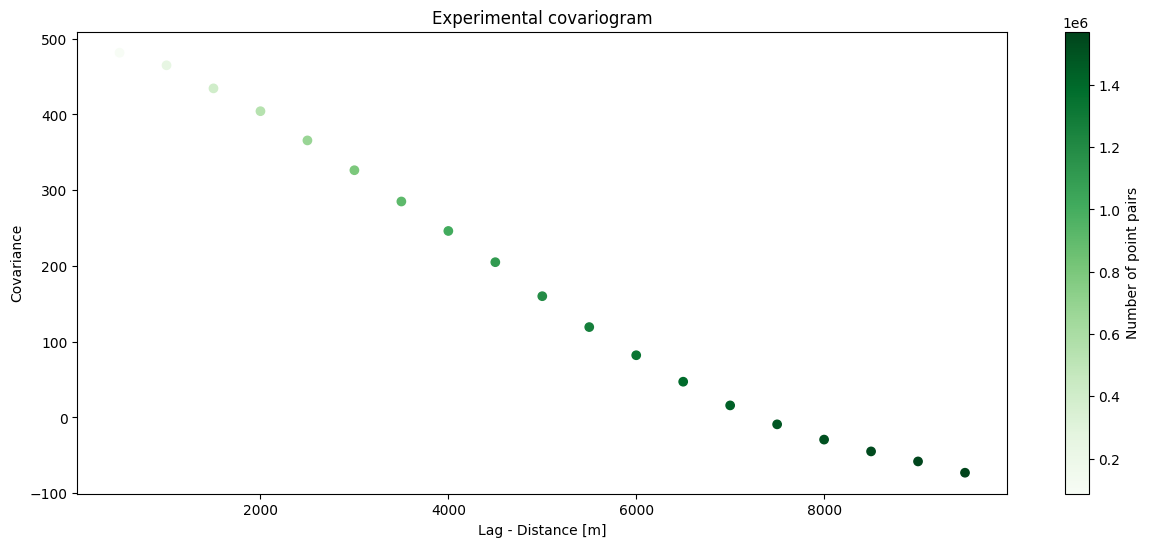

In [13]:
plt.figure(figsize=(15, 6))
plt.scatter(exp_cov[:, 0],
            exp_cov[:, 1],
            c=exp_cov[:, 2],
            cmap='Greens')
plt.title('Experimental covariogram')
plt.xlabel('Lag - Distance [m]')
plt.ylabel('Covariance')
plt.colorbar(label='Number of point pairs')
plt.show()

### Plot semivariance and covariance

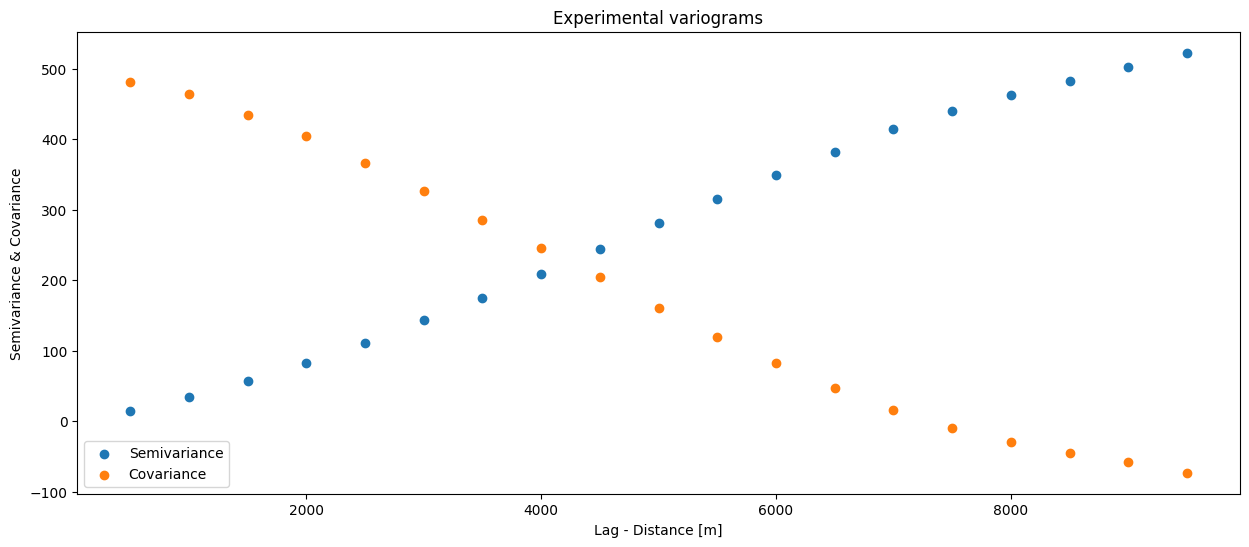

In [15]:
plt.figure(figsize=(15, 6))
plt.scatter(exp_semi[:, 0],
            exp_semi[:, 1])
plt.scatter(exp_cov[:, 0],
            exp_cov[:, 1])
plt.title('Experimental variograms')
plt.xlabel('Lag - Distance [m]')
plt.ylabel('Semivariance & Covariance')
plt.legend(['Semivariance', 'Covariance'])
plt.show()

## Summary

## Next part

## Changelog